In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [12]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [13]:
dataset.data.shape

(1797, 64)

In [14]:
len(dataset.target_names)

10

(1797, 8, 8)


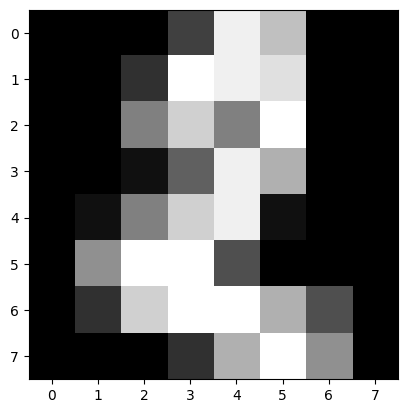

In [16]:
print(dataset.images.shape)
plt.imshow(dataset.images[2],cmap='gray')
plt.show()

In [17]:
dataset.target.shape

(1797,)

In [18]:
X= dataset.data
Y=dataset.target
Y= np.eye(10)[Y]   # one hot kardan
print(Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape , Y_train.shape, X_test.shape, Y_test.shape


(1797, 10)


((1437, 64), (1437, 10), (360, 64), (360, 10))

In [19]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

def root_mean_square_error(Y_gt , Y_pred):
  return np.sqrt(np.mean((Y_gt- Y_pred)**2))




In [20]:
epochs =80
η = 0.001   #learning rate

D_in=X_train.shape[1]   # D_in = 64
H1 = 128
H2 = 32
D_out = len(dataset.target_names)


In [21]:
W1=np.random.randn(D_in,H1)
W2=np.random.randn(H1,H2)
W3=np.random.randn(H2,D_out)

In [22]:
B1=np.random.randn(1,H1)
B2=np.random.randn(1,H2)
B3=np.random.randn(1,D_out)

In [23]:
for epoch in range(epochs):
  Y_PRED_train=[]
  Y_PRED_test=[]

  # train

  for x , y in zip(X_train,Y_train):

    x = x.reshape(-1,1)
    #forward

    # layer1
    out1 = sigmoid(x.T @ W1 + B1)

    # layer2
    out2 = sigmoid(out1 @ W2 + B2)

    # layer3
    out3 = softmax(out2 @ W3 + B3)
    Y_pred = out3
    Y_PRED_train.append(Y_pred)

    loss = root_mean_square_error(y , Y_pred)
    # backward - we should calculate moshtaq

    # layer3
    error = -2 * (y - Y_pred)
    grad_B3 = error
    grad_W3 = out2.T @ error

    # layer2
    error = error @ W3.T * out2 * (1 - out2)
    grad_B2 = error
    grad_W2 = out1.T @ error

    # layer1
    error = error @W2.T * out1 * (1 - out1)
    grad_B1 = error
    grad_W1 =  x @error


    # update

    #layer1
    W1 -= η * grad_W1
    B1 -= η * grad_B1

    #layer2
    W2 -= η * grad_W2
    B2 -= η * grad_B2


    #layer3
    W3 -= η * grad_W3
    B3 -= η * grad_B3

    # acc= ...
    # loss= ...


  for x , y in zip(X_test,Y_test):


    x = x.reshape(-1,1)
    #forward

    # layer1
    out1 = sigmoid(x.T @ W1 + B1)

    # layer2
    out2 = sigmoid(out1 @ W2 + B2)

    # layer3
    out3 = softmax(out2 @ W3 + B3)
    Y_pred = out3
    Y_PRED_test.append(Y_pred)

  Y_PRED_train = np.array(Y_PRED_train).reshape(-1,10)
  loss_train = root_mean_square_error(Y_train, Y_PRED_train)
  accuracy_train =np.sum(np.argmax(Y_train,axis=1)==np.argmax(Y_PRED_train,axis=1))/len(Y_PRED_train)
  print("train: ", accuracy_train)


  Y_PRED_test = np.array(Y_PRED_test).reshape(-1,10)
  loss_test = root_mean_square_error(Y_test, Y_PRED_test)
  accuracy_test =np.sum(np.argmax(Y_test,axis=1)==np.argmax(Y_PRED_test,axis=1))/len(Y_PRED_test)
  print("test: ",accuracy_test)

train:  0.18232428670842032
test:  0.25555555555555554
train:  0.3312456506610995
test:  0.35833333333333334
train:  0.45789839944328464
test:  0.4527777777777778
train:  0.5539318023660403
test:  0.5166666666666667
train:  0.6193458594293667
test:  0.5722222222222222
train:  0.6652748782185108
test:  0.6388888888888888
train:  0.7174669450243563
test:  0.6527777777777778
train:  0.7522616562282533
test:  0.6861111111111111
train:  0.7780097425191371
test:  0.7027777777777777
train:  0.8009742519137091
test:  0.7222222222222222
train:  0.8128044537230341
test:  0.7361111111111112
train:  0.825330549756437
test:  0.7444444444444445
train:  0.8406402226861517
test:  0.75
train:  0.848990953375087
test:  0.7583333333333333
train:  0.8580375782881002
test:  0.7611111111111111
train:  0.8663883089770354
test:  0.7694444444444445
train:  0.8768267223382046
test:  0.7805555555555556
train:  0.8844815588030619
test:  0.7861111111111111
train:  0.8942240779401531
test:  0.7916666666666666
train

In [27]:
import cv2
image = cv2.imread("input/2.jpg")
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
image = image.reshape(64,1)

x= image

#forward

# layer1
out1 = sigmoid(x.T @ W1 + B1)

# layer2
out2 = sigmoid(out1 @ W2 + B2)

# layer3
out3 = softmax(out2 @ W3 + B3)
Y_pred = out3
print(np.argmax(Y_pred))

7
